1. Configuración inicial

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

2. Definición del sistema de Lorenz

t: tiempo (no se usa explícitamente en ecuaciones autónomas)

state: vector de estado [x, y, z]

sigma, rho, beta: parámetros del sistema

derivadas [dx/dt, dy/dt, dz/dt]

In [16]:
def lorenz_system(t, state, sigma, rho, beta):
    x, y, z = state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return np.array([dx_dt, dy_dt, dz_dt])

3. Implementación del Método de Euler

f: función que define el sistema de ecuaciones

initial_state: condiciones iniciales [x0, y0, z0]

t0: tiempo inicial

tf: tiempo final

dt: paso de tiempo

parámetros del sistema [sigma, rho, beta]

t: array de tiempos

states: array de estados en cada tiempo

In [17]:
def euler_method(f, initial_state, t0, tf, dt, params):
    # Inicialización
    n_steps = int((tf - t0) / dt) + 1
    t = np.linspace(t0, tf, n_steps)
    states = np.zeros((n_steps, 3))
    states[0] = initial_state
    
    # Iteración de Euler
    for i in range(n_steps - 1):
        states[i+1] = states[i] + dt * f(t[i], states[i], *params)
    
    return t, states

4. Implementación del Método de Runge-Kutta 4 (RK4)

In [18]:
def rk4_method(f, initial_state, t0, tf, dt, params):
    """
    Implementación del método de Runge-Kutta de 4to orden
    Args:
        f: función que define el sistema de ecuaciones
        initial_state: condiciones iniciales [x0, y0, z0]
        t0: tiempo inicial
        tf: tiempo final
        dt: paso de tiempo
        params: parámetros del sistema [sigma, rho, beta]
    Returns:
        t: array de tiempos
        states: array de estados en cada tiempo
    """
    # Inicialización
    n_steps = int((tf - t0) / dt) + 1
    t = np.linspace(t0, tf, n_steps)
    states = np.zeros((n_steps, 3))
    states[0] = initial_state
    
    # Iteración RK4
    for i in range(n_steps - 1):
        k1 = dt * f(t[i], states[i], *params)
        k2 = dt * f(t[i] + dt/2, states[i] + k1/2, *params)
        k3 = dt * f(t[i] + dt/2, states[i] + k2/2, *params)
        k4 = dt * f(t[i] + dt, states[i] + k3, *params)
        
        states[i+1] = states[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return t, states

5. Simulación para caso 1

In [19]:
# Parámetros y condiciones iniciales (primer caso del proyecto)
sigma, rho, beta = 10, 28, 8/3
initial_state = np.array([1.0, 1.0, 1.0])  # x0, y0, z0

# Configuración temporal
t0, tf, dt = 0, 50, 0.01

# Ejecutar ambos métodos
t_euler, states_euler = euler_method(lorenz_system, initial_state, t0, tf, dt, (sigma, rho, beta))
t_rk4, states_rk4 = rk4_method(lorenz_system, initial_state, t0, tf, dt, (sigma, rho, beta))

5.1. Visualización de resultados

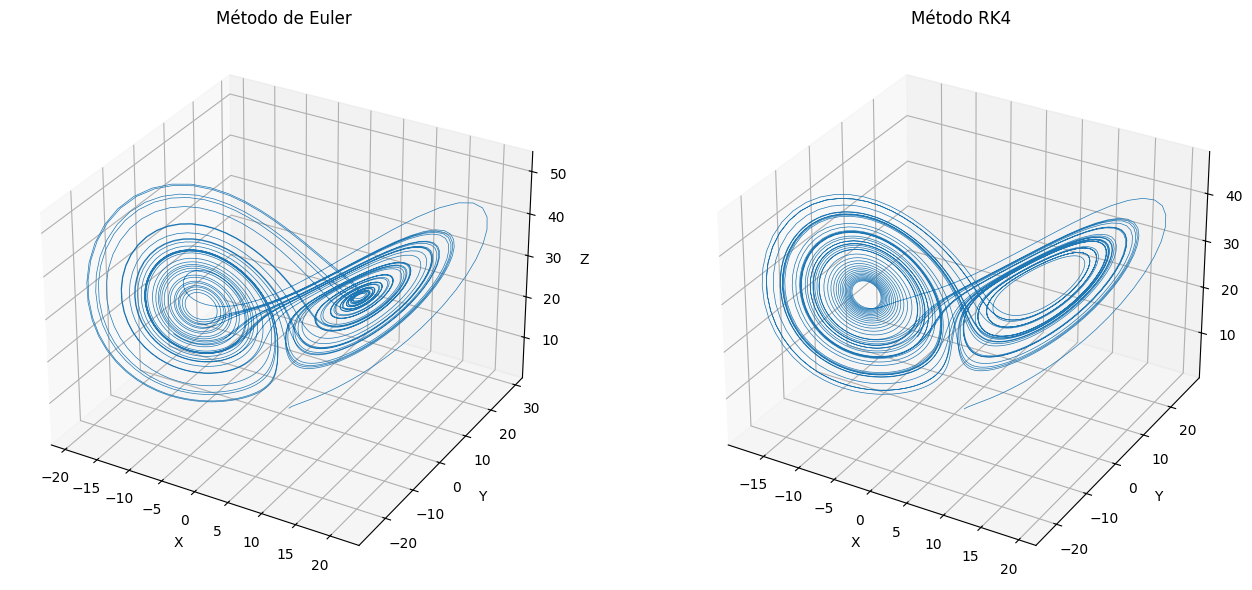

In [20]:
# Gráficas de las trayectorias en 3D
fig = plt.figure(figsize=(14, 6))

# Método de Euler
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(states_euler[:, 0], states_euler[:, 1], states_euler[:, 2], lw=0.5)
ax1.set_title("Método de Euler")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")

# Método RK4
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(states_rk4[:, 0], states_rk4[:, 1], states_rk4[:, 2], lw=0.5)
ax2.set_title("Método RK4")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")

plt.tight_layout()
plt.show()

5.2. Comparación de métodos (gráficas temporales)

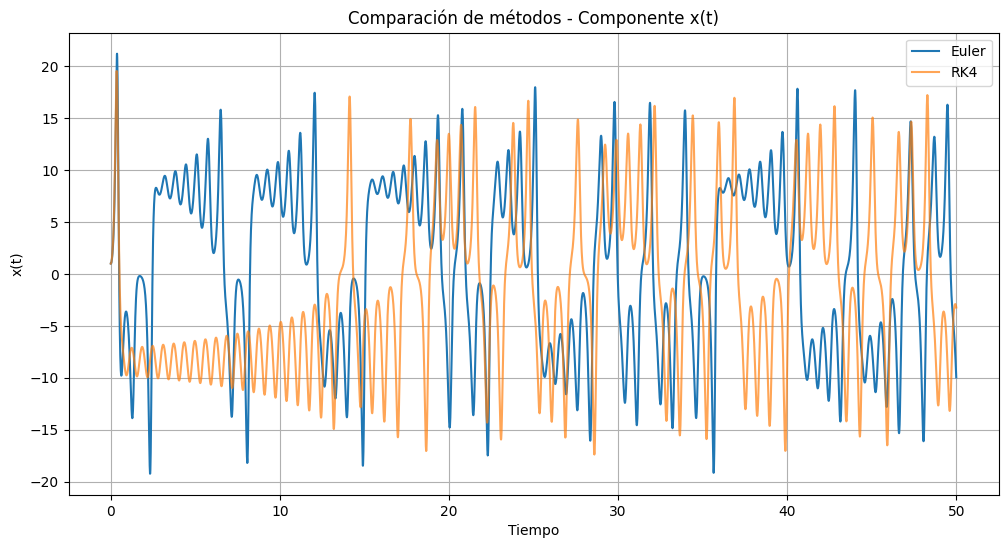

In [21]:
# Comparación de las componentes x(t)
plt.figure(figsize=(12, 6))
plt.plot(t_euler, states_euler[:, 0], label="Euler")
plt.plot(t_rk4, states_rk4[:, 0], label="RK4", alpha=0.7)
plt.title("Comparación de métodos - Componente x(t)")
plt.xlabel("Tiempo")
plt.ylabel("x(t)")
plt.legend()
plt.grid(True)
plt.show()

5.3. Animación 3D

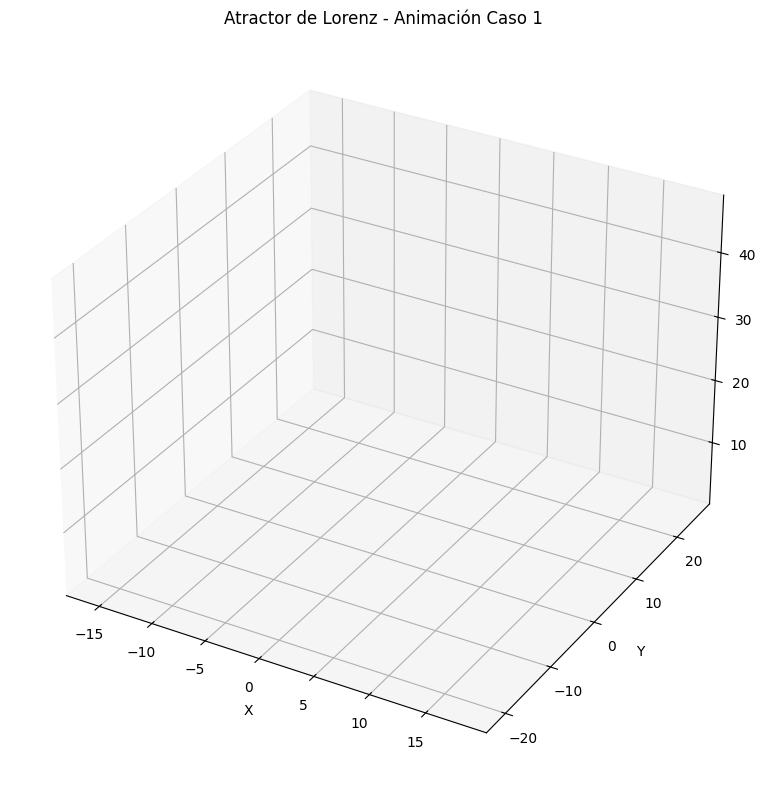

MovieWriter ffmpeg unavailable; using Pillow instead.


In [22]:
# Configuración de la figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Preparar datos (usaremos RK4 para la animación)
x, y, z = states_rk4[:, 0], states_rk4[:, 1], states_rk4[:, 2]

# Inicializar línea y punto
line, = ax.plot([], [], [], lw=0.5)
point, = ax.plot([], [], [], 'ro', markersize=6)

# Configurar límites
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), max(y))
ax.set_zlim(min(z), max(z))
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Atractor de Lorenz - Animación Caso 1")

# Función de inicialización
def init():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    return line, point

# Función de animación
def animate(i):
    # Usamos los primeros i puntos para la línea
    line.set_data(x[:i], y[:i])
    line.set_3d_properties(z[:i])
    
    # Marcamos el punto actual
    point.set_data(x[i:i+1], y[i:i+1])
    point.set_3d_properties(z[i:i+1])
    
    return line, point

# Crear animación (mostrar cada 10 frames para hacerlo más rápido)
ani = FuncAnimation(fig, animate, frames=range(0, len(x), 10),
                    init_func=init, blit=True, interval=20)

plt.tight_layout()
plt.show()

#Para guardar la animación en un gif
ani.save('lorenz_attractor_case1.gif', fps=30)

6. Simulación para caso 2

In [23]:
# Parámetros y condiciones iniciales (primer caso del proyecto)
sigma, rho, beta = 10, 28, 8/3
initial_state = np.array([1.002025, 0.2, 0.4])  # x0, y0, z0

# Configuración temporal
t0, tf, dt = 0, 50, 0.01

# Ejecutar ambos métodos
t_euler, states_euler = euler_method(lorenz_system, initial_state, t0, tf, dt, (sigma, rho, beta))
t_rk4, states_rk4 = rk4_method(lorenz_system, initial_state, t0, tf, dt, (sigma, rho, beta))

6.1. Visualización de resultados

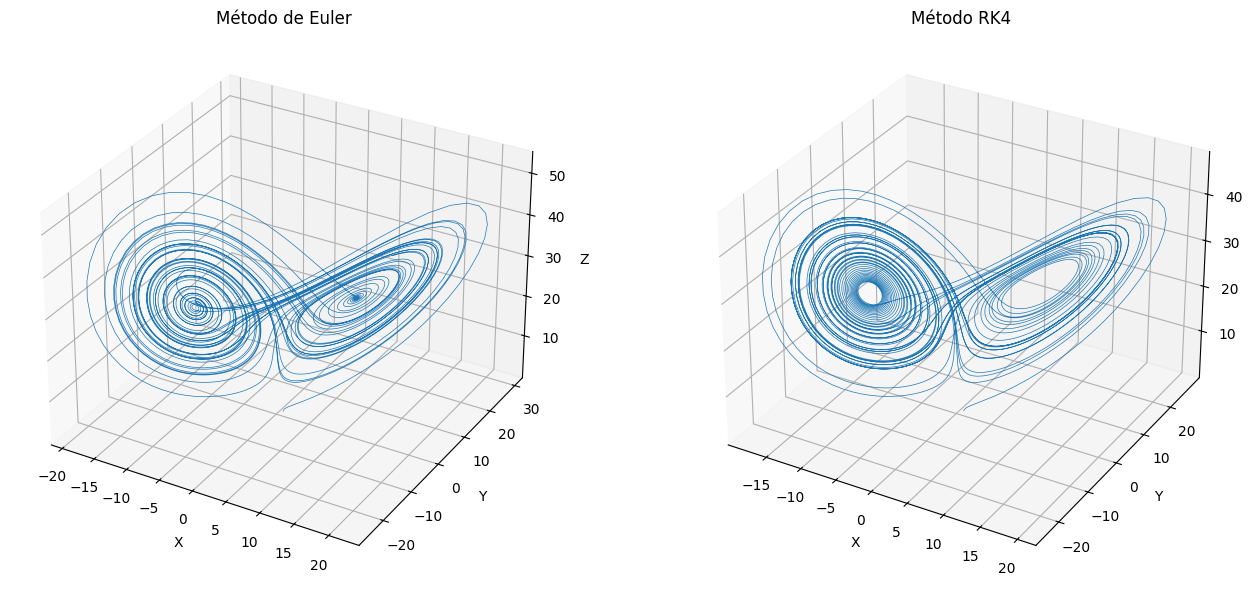

In [24]:
# Gráficas de las trayectorias en 3D
fig = plt.figure(figsize=(14, 6))

# Método de Euler
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(states_euler[:, 0], states_euler[:, 1], states_euler[:, 2], lw=0.5)
ax1.set_title("Método de Euler")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")

# Método RK4
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(states_rk4[:, 0], states_rk4[:, 1], states_rk4[:, 2], lw=0.5)
ax2.set_title("Método RK4")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")

plt.tight_layout()
plt.show()

6.3. Animación 3D

MovieWriter ffmpeg unavailable; using Pillow instead.


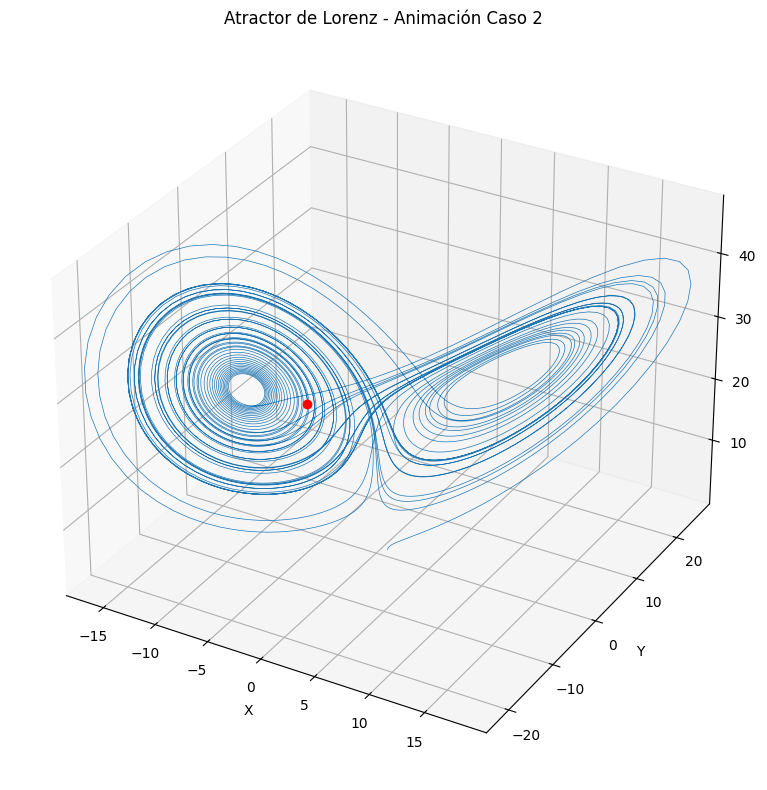

In [25]:
# Configuración de la figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Preparar datos (usaremos RK4 para la animación)
x, y, z = states_rk4[:, 0], states_rk4[:, 1], states_rk4[:, 2]

# Inicializar línea y punto
line, = ax.plot([], [], [], lw=0.5)
point, = ax.plot([], [], [], 'ro', markersize=6)

# Configurar límites
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), max(y))
ax.set_zlim(min(z), max(z))
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Atractor de Lorenz - Animación Caso 2")

# Función de inicialización
def init():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    return line, point

# Función de animación
def animate(i):
    # Usamos los primeros i puntos para la línea
    line.set_data(x[:i], y[:i])
    line.set_3d_properties(z[:i])
    
    # Marcamos el punto actual
    point.set_data(x[i:i+1], y[i:i+1])
    point.set_3d_properties(z[i:i+1])
    
    return line, point

# Crear animación (mostrar cada 10 frames para hacerlo más rápido)
ani = FuncAnimation(fig, animate, frames=range(0, len(x), 10),
                    init_func=init, blit=True, interval=20)

plt.tight_layout()

# Para guardar la animación
ani.save('lorenz_attractor_case2.gif', fps=30)

7. Simulación para caso 3

In [26]:
# Parámetros y condiciones iniciales (primer caso del proyecto)
sigma, rho, beta = 9, 18, 10/3
initial_state = np.array([2, 0.009, 0.7])  # x0, y0, z0

# Configuración temporal
t0, tf, dt = 0, 50, 0.01

# Ejecutar ambos métodos
t_euler, states_euler = euler_method(lorenz_system, initial_state, t0, tf, dt, (sigma, rho, beta))
t_rk4, states_rk4 = rk4_method(lorenz_system, initial_state, t0, tf, dt, (sigma, rho, beta))

7.1. Visualización de resultados

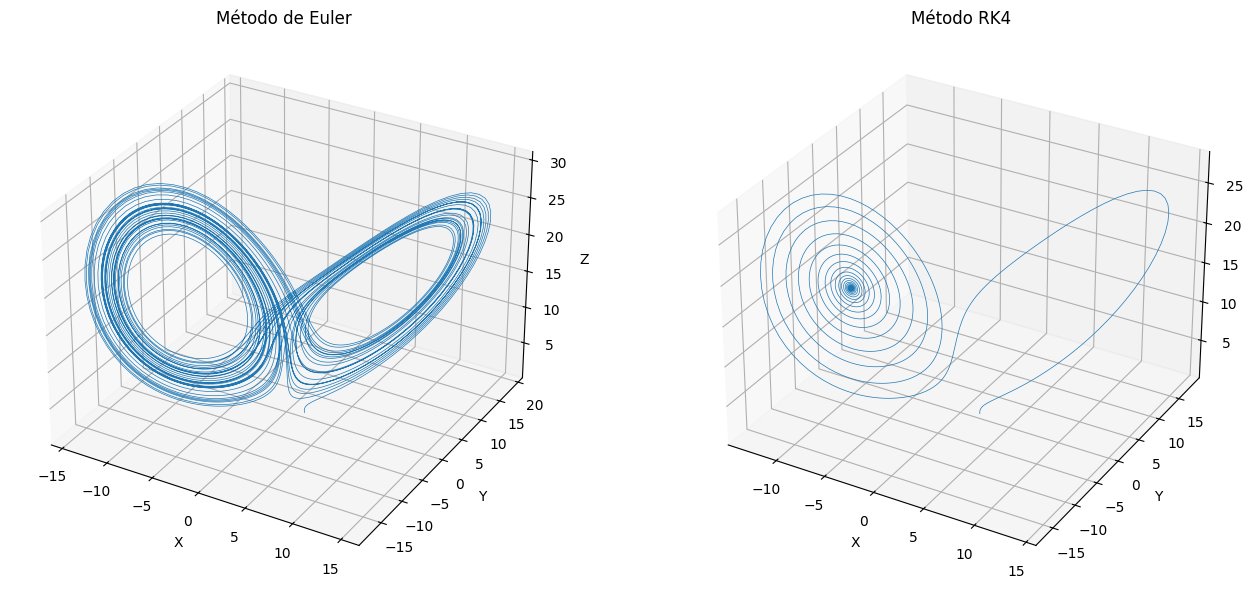

In [27]:
# Gráficas de las trayectorias en 3D
fig = plt.figure(figsize=(14, 6))

# Método de Euler
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(states_euler[:, 0], states_euler[:, 1], states_euler[:, 2], lw=0.5)
ax1.set_title("Método de Euler")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")

# Método RK4
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(states_rk4[:, 0], states_rk4[:, 1], states_rk4[:, 2], lw=0.5)
ax2.set_title("Método RK4")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")

plt.tight_layout()
plt.show()

7.3. Animación 3D

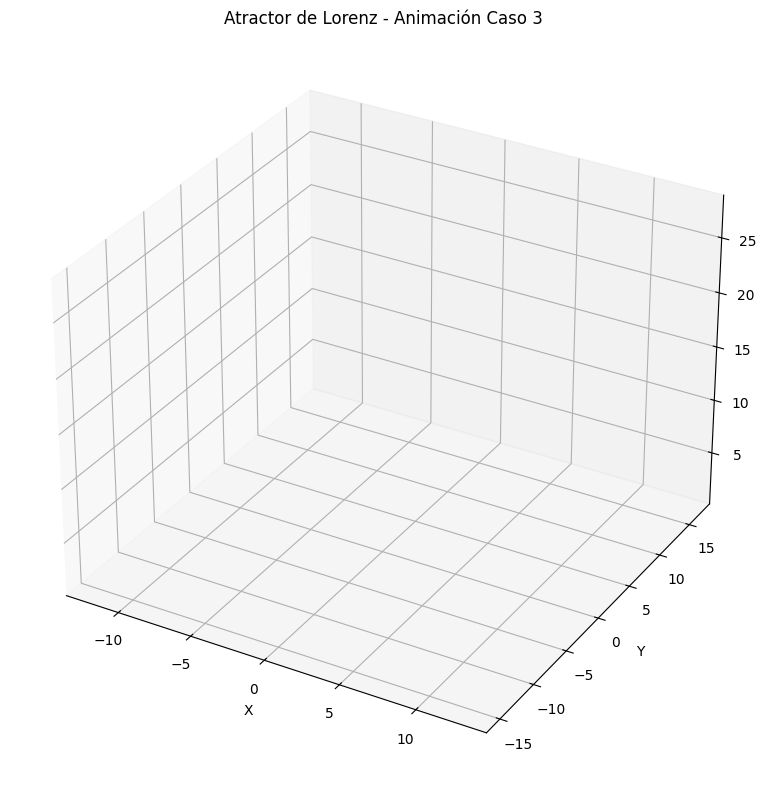

MovieWriter ffmpeg unavailable; using Pillow instead.


In [28]:
# Configuración de la figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Preparar datos (usaremos RK4 para la animación)
x, y, z = states_rk4[:, 0], states_rk4[:, 1], states_rk4[:, 2]

# Inicializar línea y punto
line, = ax.plot([], [], [], lw=0.5)
point, = ax.plot([], [], [], 'ro', markersize=6)

# Configurar límites
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), max(y))
ax.set_zlim(min(z), max(z))
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Atractor de Lorenz - Animación Caso 3")

# Función de inicialización
def init():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    return line, point

# Función de animación
def animate(i):
    # Usamos los primeros i puntos para la línea
    line.set_data(x[:i], y[:i])
    line.set_3d_properties(z[:i])
    
    # Marcamos el punto actual
    point.set_data(x[i:i+1], y[i:i+1])
    point.set_3d_properties(z[i:i+1])
    
    return line, point

# Crear animación (mostrar cada 10 frames para hacerlo más rápido)
ani = FuncAnimation(fig, animate, frames=range(0, len(x), 10),
                    init_func=init, blit=True, interval=20)

plt.tight_layout()
plt.show()

# Para guardar la animación
ani.save('lorenz_attractor_case3.gif', fps=30)